In [1]:
!pip install pyunpack
!pip install patool
!pip install py7zr
!pip install pathlib

     |████████████████████████████████| 77 kB 941 kB/s 
     |████████████████████████████████| 65 kB 780 kB/s 
     |████████████████████████████████| 2.2 MB 1.7 MB/s 
     |████████████████████████████████| 357 kB 37.9 MB/s 
     |████████████████████████████████| 121 kB 59.0 MB/s 
     |████████████████████████████████| 1.9 MB 32.5 MB/s 
     |████████████████████████████████| 49 kB 683 kB/s 
  Created wheel for pathlib: filename=pathlib-1.0.1-py3-none-any.whl size=14347 sha256=563f0f5e2dde98cefe034e68796bb0cb227679d64f9e7a1137992132c1347fad
  Stored in directory: /root/.cache/pip/wheels/6e/96/b8/10037fe231e23970bac58361d7c93571ab983a7bbc55e68550
Successfully built pathlib


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tensorflow-speech-recognition-challenge/link_to_gcp_credits_form.txt
/kaggle/input/tensorflow-speech-recognition-challenge/test.7z
/kaggle/input/tensorflow-speech-recognition-challenge/sample_submission.7z
/kaggle/input/tensorflow-speech-recognition-challenge/train.7z


In [3]:
!pwd
os.getcwd()

/kaggle/working


'/kaggle/working'

In [4]:
from pathlib import Path
import random
from importlib import reload
import warnings
warnings.filterwarnings("ignore")


import IPython.display as ipd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter
import seaborn as sns
import soundfile as sf
from tqdm import tqdm_notebook as tqdm

import librosa
from scipy.io import wavfile
import numpy as np

import glob

In [5]:
from py7zr import unpack_7zarchive
import shutil

shutil.register_unpack_format('7zip', ['.7z'], unpack_7zarchive)
shutil.unpack_archive('/kaggle/input/tensorflow-speech-recognition-challenge/train.7z', '/kaggle/working/tensorflow-speech-recognition-challenge/')

In [6]:
path_base = Path('/kaggle/working/tensorflow-speech-recognition-challenge/train')
paths_train = list(path_base.glob('**'))
paths_train

[PosixPath('/kaggle/working/tensorflow-speech-recognition-challenge/train'),
 PosixPath('/kaggle/working/tensorflow-speech-recognition-challenge/train/audio'),
 PosixPath('/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/off'),
 PosixPath('/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/six'),
 PosixPath('/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/_background_noise_'),
 PosixPath('/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/up'),
 PosixPath('/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/dog'),
 PosixPath('/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/bird'),
 PosixPath('/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/bed'),
 PosixPath('/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/right'),
 PosixPath('/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/tree'),
 PosixPath('/kaggle/working/tensorflow-

In [7]:
print([str(path).split('/')[-1] for path in paths_train] )

['train', 'audio', 'off', 'six', '_background_noise_', 'up', 'dog', 'bird', 'bed', 'right', 'tree', 'zero', 'three', 'nine', 'five', 'two', 'happy', 'stop', 'no', 'down', 'go', 'cat', 'marvin', 'seven', 'four', 'eight', 'house', 'one', 'yes', 'wow', 'on', 'left', 'sheila']


In [8]:
os.listdir('/kaggle/working/tensorflow-speech-recognition-challenge/train/audio')

['off',
 'six',
 '_background_noise_',
 'up',
 'dog',
 'bird',
 'bed',
 'right',
 'tree',
 'zero',
 'three',
 'nine',
 'five',
 'two',
 'happy',
 'stop',
 'no',
 'down',
 'go',
 'cat',
 'marvin',
 'seven',
 'four',
 'eight',
 'house',
 'one',
 'yes',
 'wow',
 'on',
 'left',
 'sheila']

In [9]:
trial_path = '/kaggle/working/tensorflow-speech-recognition-challenge/train/audio'
cnt = 0
for dirnames, _, filenames in os.walk(trial_path):
    cnt += len(filenames)

In [10]:
cnt

64728

In [11]:
path_of_audios = '/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/house'
house_audio = os.listdir(path_of_audios) #List of all file names inside house folder


for i in range(300,400):
    print(path_of_audios+'/'+house_audio[i])
    
sr = 16000 #hz (sample rate)

/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/house/65ec06e5_nohash_0.wav
/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/house/7f17667c_nohash_1.wav
/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/house/620ff0fa_nohash_1.wav
/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/house/ec545975_nohash_0.wav
/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/house/f9af0887_nohash_0.wav
/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/house/1657c9fa_nohash_0.wav
/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/house/6dfff95a_nohash_1.wav
/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/house/6c0f6493_nohash_0.wav
/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/house/cc6bae0d_nohash_0.wav
/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/house/118261a9_nohash_0.wav
/kaggle/working/tensorflow-speech-recogn

In [12]:
idx = 7
samples, sample_rate = librosa.load(path_of_audios+'/'+house_audio[idx], sr = sr)
samples.shape

(13995,)

In [13]:
ipd.Audio(samples, rate = sr)

In [14]:
ipd.Audio(path_of_audios+'/'+house_audio[idx])

samples

ValueError: x and y must have same first dimension, but have shapes (16000,) and (13995,)

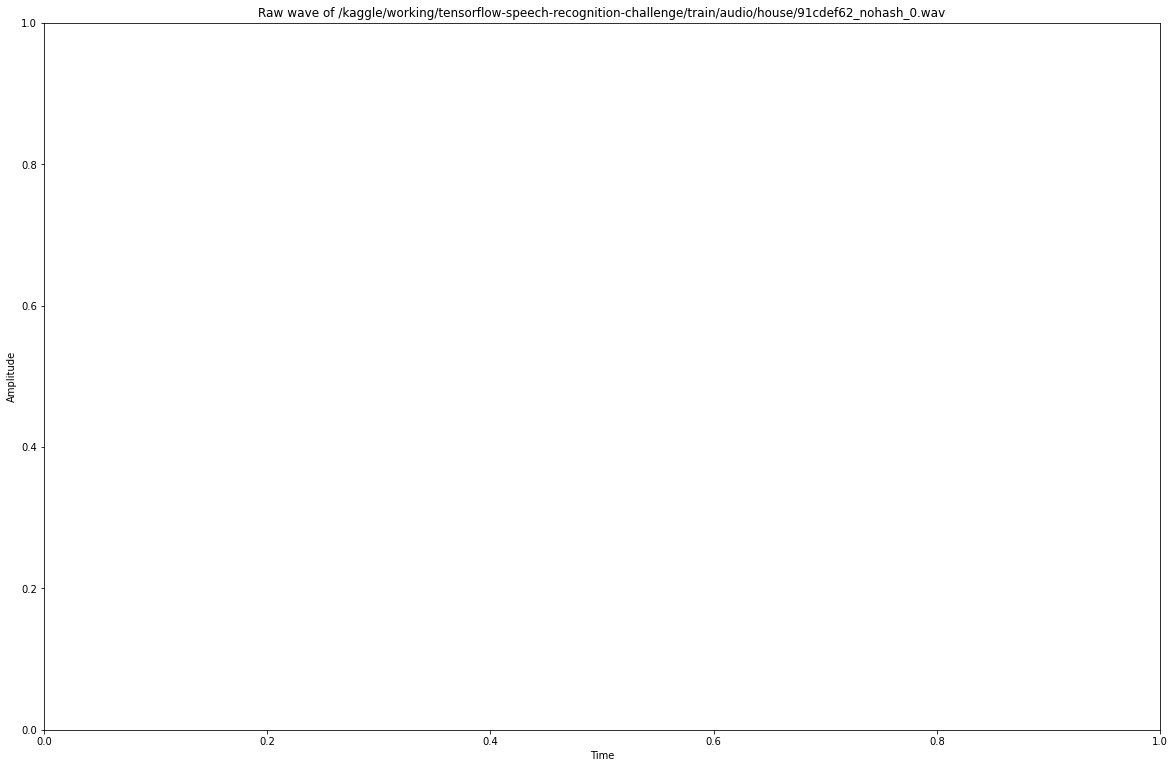

In [15]:
fig = plt.figure(figsize=(20,13))
x_values = np.linspace(0,sr/len(samples),sr)
y_values = samples
ax = plt.gca()
ax.set_title('Raw wave of '+path_of_audios+'/'+house_audio[idx])
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
plt.plot(x_values, y_values)

In [ ]:
16*3

In [ ]:
resamples = librosa.resample(samples, sr, 8000)
ipd.Audio(resamples, rate=8000)

In [ ]:
# sample rate is how many complete cycles we have in one second

In [ ]:
labels=[ 'dog', 'one', 'down', 'right', 'cat', 'bed', 'up', 'eight', 'marvin', 'six', 'nine', 'four',
        'five', 'yes', 'three', 'wow', 'sheila', 'zero', 'seven', 'happy', 'go', 'bird', 'two', 'stop', 'off', 'tree',  'house', 'on', 'left', 'no']

In [ ]:
len(labels)

In [ ]:
# 1- resample all files
# 2- Keep only the files that belong to our labels.
# x is the features (It is the amplitude in the time domain). (all_wave)
# y is the labels. (all_label)

all_wave = []
all_label = []
path = '/kaggle/working/tensorflow-speech-recognition-challenge/train/audio/'
for label in labels:
    waves = [file for file in os.listdir(path+label) if file.endswith('.wav')] 
    for wav in waves:
        samples,sr = librosa.load(path+label+'/'+wav, sr=16_000)
        resamples = librosa.resample(samples, sr, 8_000)
        
        if len(resamples)==8_000:
            all_wave.append(resamples)
            all_label.append(label)

In [ ]:
print(len(all_wave))

In [ ]:
for i in range(10):
    print(all_wave[i].shape)

# Building The Model

## preparing the output

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [ ]:
from keras.utils import np_utils
y = np_utils.to_categorical(y, num_classes = len(labels))

In [ ]:
y.shape

## Reshaping the Input

In [ ]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [ ]:
all_wave.shape

## Splitting Into Train and Validation Datasets

In [ ]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr , y_val = train_test_split(all_wave,y, stratify = y, test_size = 0.2, shuffle =True)

## Keras Model

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

In [ ]:
inputs = Input(shape=(8000,1))

# First Conv1D layer
conv = Conv1D(8, 12, padding="valid", activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

# Second Conv1D layer
conv = Conv1D(16, 11, padding="valid", activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

# Third Conv1D layer
conv = Conv1D(32, 9, padding="valid", activation='relu', strides=1)(conv)
conv = MaxPooling1D(pool_size=3)(conv)
conv = Dropout(0.3)(conv)

# Fourth Conv1D layer
conv = Conv1D(64,7, padding="valid", activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

conv = Flatten()(conv)

#Dense Layer1
conv = Dense(128, activation = 'relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer2
conv = Dense(128, activation = 'relu')(conv)
conv = Dropout(0.3)(conv)

# The output Function of the last layer is not ReLU, it's SofMax
#len(labels) is 10
outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

es = EarlyStopping(monitor = 'val_loss', mode='min', verbose=1, patience = 10)

mc = ModelCheckpoint('kaggle/working/best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, 
                     mode='max')
history = model.fit(x_tr, y_tr, callbacks=[es,mc],validation_data=(x_val,y_val),
          epochs=100, batch_size = 32)

In [ ]:
# model.save('kaggle/working/')

model.save("my_h5_model.h5")

In [ ]:
from keras.models import load_model

model = load_model('my_h5_model.h5')
model.summary()

In [ ]:
def predict(audio):
    prob = model.predict(audio.reshape(-1,8_000,1)) #prob is a vector of 10 values
    index = np.argmax(prob[0])
    return classes[index]

In [ ]:
samples = x_tr[24564].flatten()
print(predict(samples))
ipd.Audio(samples,rate=8_000)

In [ ]:
import sounddevice as sd
import soundfile as sf

samplerate = 16000  
duration = 1 # seconds
filename = 'yes.wav'
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)

In [ ]:
#reading the voice commands
samples, sample_rate = librosa.load(filepath + '/' + 'stop.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)     

In [ ]:
predict(samples)

In [ ]:
Why do we need a validation dataset?
How many epochs did you need to train your model?
What was your stopping criteria to stop training?
Which libraries did you use for building your model and converting the audio files?
What was the proportion you used to split your data into train and validation datasets?
How many parameters do you have in your model?
What is your optimizer?

Why did you use Conv1D not Conv2D?
What is the sample rate that you used to train your model, and why?
What is your evaluation metric?
What is the spectrogram representation?
What is the sampling rate?